# Sentiment Analysis 

La sentiment Analysis est le fait de regarder ce que vos clients pensent de votre produit. Dans ce tutoriel, nous allons essayer de comprendre ce que les gens pensent du parc d'attraction disneyland. 

## Data Preprocessing

### Import Data 

1. Commencez par installer tensorflow 2.0.0 

In [1]:
# Installation TensorFlow
!pip install --upgrade tensorflow

  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached jax-0.4.12.tar.gz (1.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached opt_einsum-3.3.0-py3-non

2. Importez les librairies suivantes :

* tensorflow 
* tensorflow_datasets
* pandas 

In [2]:
# Import des librairies TensorFlow & Pathlib 
import tensorflow as tf 
import tensorflow_datasets as tfds
import pathlib 
import pandas as pd 
tf.__version__

'2.2.0'

3. Copiez le lien ci-dessous et lisez le fichier qu'il contient avec `pandas`

* https://go.aws/314bBDq

In [3]:
# Import du dataset dans Pandas 
dataset = pd.read_csv("https://go.aws/314bBDq", error_bad_lines=False, encoding="utf-8")
dataset.head()

,user_id,review,stars,date_format,time_of_day,hour_of_day,day_of_week,review_format,review_lang,month_year,review_len,review_nb_words
0,efb62a167fee5cf3678b24427de8e31f,"Génial, fabuleux, exceptionnel ! J'aimerais qu...",5,2017-09-29 18:17:00,18:17,18,Ven,génial fabuleux exceptionnel j aimerais qu...,french,2017-09,115,19
1,e3be4f9c9e0b9572bfb2a5f88497bb14,NaN,2,2017-09-29 17:29:00,17:29,17,Ven,NaN,NaN,2017-09,0,0
2,1b8e5760162d867e9b9ca80f645bdc60,"Toujours aussi magic, féerique !",5,2017-09-29 16:46:00,16:46,16,Ven,toujours aussi magic féerique,french,2017-09,32,4
3,fa330e5891a1bb486c3e9bf95c098726,NaN,5,2017-09-29 15:52:00,15:52,15,Ven,NaN,NaN,2017-09,0,0
4,c1a693206aee1a2412d4bd9e45b80ec5,NaN,3,2017-09-29 15:29:00,15:29,15,Ven,NaN,NaN,2017-09,0,0


4. Nous allons avoir besoin des reviews en français. Filtrez donc les reviews pour qu'elles soient dans la bonne langue. 

In [4]:
# Prenons que les reviews françaises 
french_reviews = dataset[dataset.review_lang == "french"]
french_reviews.head()

,user_id,review,stars,date_format,time_of_day,hour_of_day,day_of_week,review_format,review_lang,month_year,review_len,review_nb_words
0,efb62a167fee5cf3678b24427de8e31f,"Génial, fabuleux, exceptionnel ! J'aimerais qu...",5,2017-09-29 18:17:00,18:17,18,Ven,génial fabuleux exceptionnel j aimerais qu...,french,2017-09,115,19
2,1b8e5760162d867e9b9ca80f645bdc60,"Toujours aussi magic, féerique !",5,2017-09-29 16:46:00,16:46,16,Ven,toujours aussi magic féerique,french,2017-09,32,4
11,726b1a3e2664e8b075129bcd643dbf56,En vacances en région parisienne nous nous som...,2,2017-09-29 00:37:00,00:37,0,Ven,en vacances en région parisienne nous nous som...,french,2017-09,172,25
12,8a71763fbb3da7436b957681b24cc404,Tropbeaufinalpleinlesyeuxoreil,5,2017-09-29 00:16:00,00:16,0,Ven,tropbeaufinalpleinlesyeuxoreil,french,2017-09,30,1
23,ce7abd7798ee036d667c0ad84b85daa7,L'univers Disney reste merveilleux. Toutefois ...,4,2017-09-28 20:24:00,20:24,20,Jeu,l univers disney reste merveilleux toutefois ...,french,2017-09,148,23


5. Gardez uniquement les colonnes `review_format` & `stars`

In [5]:
# Prenons que les colonnes qui nous intéresse 
french_reviews = french_reviews[["review_format", "stars"]]
french_reviews.head()

,review_format,stars
0,génial fabuleux exceptionnel j aimerais qu...,5
2,toujours aussi magic féerique,5
11,en vacances en région parisienne nous nous som...,2
12,tropbeaufinalpleinlesyeuxoreil,5
23,l univers disney reste merveilleux toutefois ...,4


6. Enlevez les valeurs manquantes

In [6]:
# Suppression des NaN
french_reviews = french_reviews.dropna()

7. Regardez les valeurs uniques pour chacune des étoiles 

In [7]:
# Valeurs uniques
french_reviews["stars"].unique()

array([5, 2, 4, 3, 1])

8. Regardez la `shape` de votre base de données 

In [8]:
# Shape of french_reviews dataset
french_reviews.shape

(8474, 2)

9. Créez un dataset tensorflow dans lequel vous insererez votre `reviews` et vos `stars`.

NB : Votre variable cible & vos variables explicatives doivent être insérées dans un tuple. 

In [9]:
  # Création d'un tf dataset à partir de pandas 
  tf_ds = tf.data.Dataset.from_tensor_slices((french_reviews["review_format"].values, french_reviews["stars"].values))

10. Regardez un exemple

In [10]:
# Regardons un exemple 
for review, star in tf_ds.take(1):
  print(review, star)

tf.Tensor(b'g\xc3\xa9nial  fabuleux  exceptionnel   j aimerais que walt disney se r\xc3\xa9veille pour admirer ce qu il \xc3\xa0 laiss\xc3\xa9 derri\xc3\xa8re lui', shape=(), dtype=string) tf.Tensor(5, shape=(), dtype=int64)


11. Randomisez votre dataset via `shuffle()`

In [11]:
# Shuffle le dataset 
tf_ds = tf_ds.shuffle(50000)

### Tokenize

Nous allons maintenant passer par une phase de Tokenisation. Autrement dit, nous allons assigner un numéro à chacun des mots présent dans notre corpus de texte. 

1. Créez un `Tokenizer` et mettez tous ces tokens dans un `set()`

In [12]:
# Création d'une instance Tokenizer
tokenizer = tfds.features.text.Tokenizer()

# Nous allons tokenizer chacun des mots en elevant les doublons via l'utilisation de set()
vocabulary_set = set()
for text_tensor, _ in tf_ds:
  some_tokens = tokenizer.tokenize(text_tensor.numpy())
  vocabulary_set.update(some_tokens)

vocab_size = len(vocabulary_set)
vocab_size

13460

2. Instanciez un `TokenTextEncoder`

In [13]:
# Création d'un nombre pour chacun des tokens que nous avons créés au dessus
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set)

In [14]:
encoder.vocab_size

13462

3. Regardez un exemple 

In [15]:
# Regardons le résultat sur un exemple 
for example, _ in tf_ds.take(1):
  print(encoder.encode(example.numpy()))
  print(example.numpy())

[7781, 7040, 4892, 6144, 10180, 5129, 4587, 4628]
b'toujours un plaisir de venir dans ce parc   '


4. Appliquez votre encoder sur toutes les phrases de votre dataset 

In [16]:
# Encodons maintenant tous les éléments d'un dataset
def encode(text_tensor, label):
  encoded_text = encoder.encode(text_tensor.numpy())
  return encoded_text, label

# Utilisation du fonction py_function pour encoder tout le dataset 
def encode_map_fn(text, label):
  return tf.py_function(encode, inp=[text, label], Tout=(tf.int64, tf.int64))

all_encoded_data = tf_ds.map(encode_map_fn)

5. Faites un `train_test_split` de vos données (gardez 70% environs dans le train)

In [17]:
# Train Test Split
TAKE_SIZE = 6000

train_data = all_encoded_data.skip(TAKE_SIZE).shuffle(50000)
train_data = train_data.padded_batch(16,  padded_shapes=([-1], []))

test_data = all_encoded_data.take(TAKE_SIZE)
test_data = test_data.padded_batch(16, padded_shapes=([-1], []))

6. Regardez un batch de données 

In [18]:
 # Regardons un batch 
for review, star in train_data.take(1):
  print(review)

tf.Tensor(
[[  555  2219  2702 ...     0     0     0]
 [11114 11385  5129 ...     0     0     0]
 [ 7915  6508  2579 ...     0     0     0]
 ...
 [  298  1031  1858 ...     0     0     0]
 [ 6623  2208  7970 ...     0     0     0]
 [ 7040 13424 11027 ...     0     0     0]], shape=(16, 150), dtype=int64)


## Modeling 

Créons un modèle basé sur une couche LSTM pour classer nos différentes traductions 

1. Reprenez l'architecture que nous avons vu dans le tutoriel de NLP. Tentez simplement de la complexifier et éventuellement d'ajouter une couche CNN-1D qui peut aider le modèle à resumer l'information  

In [19]:
model = tf.keras.Sequential([
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(encoder.vocab_size, 64),

                  # Couche LSTM Bidirectionnelle
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),

                  # Couche CNN
                  tf.keras.layers.Conv1D(16, 3, activation="relu"),
                  
                  # Nouvelle couche LSTM
                  tf.keras.layers.LSTM(32, return_sequences=False),               

                  # Couche Dense classique 
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dense(32, activation='relu'),
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),

                  # Couche de sortie avec le nombre de neurones en sortie égale au nombre de classe avec fonction softmax
                  tf.keras.layers.Dense(6, activation="softmax")
                                              
])

2. Créez un `learning_rate_schedule` et compilez votre modèle avec la bonne fonction de coût 

In [20]:
# Créons un learning rate schedule pour décroitre le learning rate à mesure que nous entrainons le modèle 
initial_learning_rate = 0.0001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

# Utilisation d'un compileur simple avec un optimiseur Adam pour le calcul de nos gradients 
optimizer= tf.keras.optimizers.Adam(
    learning_rate = lr_schedule
)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

3. Fittez votre modèle sur 40 epochs 

In [21]:
# Entrainement du modèle 
history = model.fit(train_data, epochs=40, validation_data=test_data)

Epoch 1/40
155/155 [==============================] - 23s 150ms/step - loss: 1.5754 - sparse_categorical_accuracy: 0.5711 - val_loss: 1.3872 - val_sparse_categorical_accuracy: 0.5733
Epoch 2/40
155/155 [==============================] - 12s 77ms/step - loss: 1.3170 - sparse_categorical_accuracy: 0.5950 - val_loss: 1.3453 - val_sparse_categorical_accuracy: 0.5710
Epoch 3/40
155/155 [==============================] - 11s 69ms/step - loss: 1.3183 - sparse_categorical_accuracy: 0.5788 - val_loss: 1.3134 - val_sparse_categorical_accuracy: 0.5737
Epoch 4/40
155/155 [==============================] - 12s 74ms/step - loss: 1.3095 - sparse_categorical_accuracy: 0.5663 - val_loss: 1.2896 - val_sparse_categorical_accuracy: 0.5752
Epoch 5/40
155/155 [==============================] - 11s 72ms/step - loss: 1.2642 - sparse_categorical_accuracy: 0.5837 - val_loss: 1.2765 - val_sparse_categorical_accuracy: 0.5747
Epoch 6/40
155/155 [==============================] - 11s 69ms/step - loss: 1.2571 - spar

4. Notre modèle commence à avoir de bonnes performances. Mais, si vous regardez la répartition des classes de notre dataset. Nous avons un dataset très déséquilibré et centré autour des 5 étoiles. Créez donc un dictionnaire représentant les poids dans notre modèle pour chaque classe. Essayez de pénaliser les 5 étoiles et les 4 étoiles pour contrebalancer leur sur-présence 

In [22]:
# Balance des classes
class_weight = {
    0:0,
    1:2,
    2:2,
    3:1,
    4:0.75,
    5:0.5
}

5. Fittez à nouveau votre modèle sur 40 epochs en ajoutant le paramètre `class_weight= NAME_OF_YOUR_DICTIONNARY`

In [23]:
# Entrainement du modèle 
history = model.fit(train_data, 
                    epochs=40, 
                    validation_data=test_data,
                    class_weight=class_weight)

Epoch 1/40
155/155 [==============================] - 9s 60ms/step - loss: 1.0047 - sparse_categorical_accuracy: 0.6059 - val_loss: 1.1065 - val_sparse_categorical_accuracy: 0.5375
Epoch 2/40
155/155 [==============================] - 9s 59ms/step - loss: 1.0196 - sparse_categorical_accuracy: 0.5962 - val_loss: 1.0308 - val_sparse_categorical_accuracy: 0.6222
Epoch 3/40
155/155 [==============================] - 9s 61ms/step - loss: 1.0381 - sparse_categorical_accuracy: 0.6051 - val_loss: 1.0654 - val_sparse_categorical_accuracy: 0.6205
Epoch 4/40
155/155 [==============================] - 9s 61ms/step - loss: 1.0352 - sparse_categorical_accuracy: 0.6103 - val_loss: 1.0860 - val_sparse_categorical_accuracy: 0.5960
Epoch 5/40
155/155 [==============================] - 9s 60ms/step - loss: 0.9889 - sparse_categorical_accuracy: 0.6245 - val_loss: 1.0349 - val_sparse_categorical_accuracy: 0.6292
Epoch 6/40
155/155 [==============================] - 10s 61ms/step - loss: 0.9885 - sparse_cat

6. Visualisez un exemple de prédiction sur vos données de test

In [24]:
for example, _ in test_data.take(1):
  print(example, _)
  print(model.predict_classes(example))

tf.Tensor(
[[ 9431  9933  4333 ...     0     0     0]
 [ 5192  4758  6144 ...     0     0     0]
 [ 8270 10698  2702 ...     0     0     0]
 ...
 [ 2752  2947   404 ...  3398 11008  2947]
 [ 1949  2208 11881 ...     0     0     0]
 [ 5943  6508 10208 ...     0     0     0]], shape=(16, 156), dtype=int64) tf.Tensor([5 4 5 4 5 3 4 5 4 5 5 5 5 3 5 5], shape=(16,), dtype=int64)
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[5 5 5 4 5 3 5 5 4 5 4 5 5 2 5 5]


## Evaluation 

1. Créez un graphique visualisant votre loss par rapport au nombre d'epochs

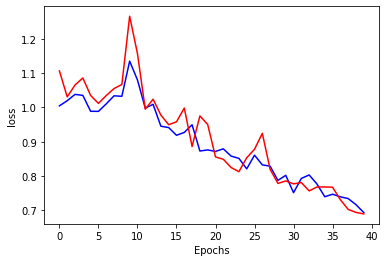

In [25]:
import matplotlib.pyplot as plt

# Visualisation du processus d'entrainement sur la loss function 
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

2. Créez un graphique visualisant votre accuracy par rapport au nombre d'epochs

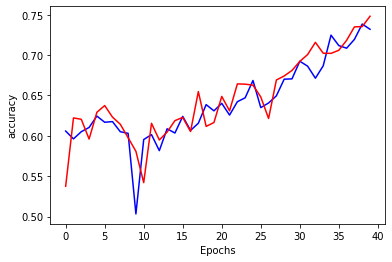

In [26]:
# Visualisation de l'entrainement sur l'accuracy 
plt.plot(history.history["sparse_categorical_accuracy"], color="b")
plt.plot(history.history["val_sparse_categorical_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.show()